## PASO 0 EXTRACCION DE DATOS (df_v0)

In [90]:
#REALIZAMOS LA EXTRACCION DE DATOS
import pandas as pd
df_v0 = pd.read_csv('Practica insurance_claims.csv',na_values ="?")

df_v0

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [91]:
#COMPROBAMOS LOS DATOS ÚNICOS DE TODAS LAS COLUMNAS
df_v0.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

## PASO 1 TRAS ANALIZAR CADA VARIABLE SEGUIRÉ LAS SIGUIENTES MODIFICACIONES PARA CADA VARIABLE:
    
    months_as_customer              391 -> C1: agrupar en grupos de 5 años
    age                              46 -> C1: Agrupar en grupos de 5 en cinco años
    policy_number                  1000 -> Eliminar
    policy_bind_date                951 -> Eliminar
    policy_state                      3 -> OneHotEncoder
    policy_csl                        3 -> OneHotEncoder
    policy_deductable                 3 -> OneHotEncoder
    policy_annual_premium           991 -> Kbins discretizer
    umbrella_limit                   11 -> OneHotEncoder
    insured_zip                     995 -> Eliminar
    insured_sex                       2 -> OneHotEncoder
    insured_education_level           7 -> LabelEncoder
    insured_occupation               14 -> LabelEncoder
    insured_hobbies                  20 -> LabelEncoder
    insured_relationship              6 -> LabelEncoder
    capital-gains                   338 -> Kbins discretizer
    capital-loss                    354 -> Kbins discretizer
    incident_date                    60 -> Convertir a día de la semana
    incident_type                     4 -> OneHotEncoder
    collision_type                    3 -> C1: SimpleImputer(mostfrecuent), C2: SimpleImputer(value), OneHotEncoder
    incident_severity                 4 -> OneHotEncoder
    authorities_contacted             5 -> OneHotEncoder
    incident_state                    7 -> OneHotEncoder
    incident_city                     7 -> OneHotEncoder
    incident_location              1000 -> Eliminar
    incident_hour_of_the_day         24 -> Convertir en rangos horarios
    number_of_vehicles_involved       4 -> Nada
    property_damage                   2 -> C1: SimpleImputer(mostfrecuent), C2: SimpleImputer(value),OneHotEncoder
    bodily_injuries                   3 -> Nada
    witnesses                         4 -> Nada
    police_report_available           2 -> C1: SimpleImputer(mostfrecuent), C2: (value), OneHotEncoder
    total_claim_amount              763 -> Kbins discretizer
    injury_claim                    638 -> Kbins discretizer
    property_claim                  626 -> Kbins discretizer
    vehicle_claim                   726 -> Kbins discretizer
    auto_make                        14 -> LabelEncoder
    auto_model                       39 -> LabelEncoder
    auto_year                        21 -> LabelEncoderc
    fraud_reported                    2 -> LabelEncoder

## PASO 2 CREACIÓN DE NUEVAS VARIABLES Y POSTERIOR CODIFICACIÓN A CATEGÓRICO (df_v01)

In [92]:
from datetime import datetime as dt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

#TODAS LAS NUEVAS COLUMNAS SE CREARAN Y AÑADIRAN EN EL NUEVO DATAFRAME df_v01
df_v01 = pd.DataFrame()

#AGRUPAMOS EDADES DE 5 EN 5 en la columna "age"
df_v01["age_TOAGEGROUP"]=np.floor(df_v0["age"].values/5).astype(int)

#CONVERTIMOS MESES COMO CLIENTES EN AÑOS COMO CLIENTES en la columna "months_as_customer"
df_v01["months_as_customer_TOYEAR"]=np.floor(df_v0["months_as_customer"].values/12).astype(int)


#CONVERTIMOS EL DÍA DE INCIDENTE EN DÍA DE LA SEMANA  en la columna 'incident_date'
df_v01['incident_date_TOWEEKDAY'] = pd.to_datetime(df_v0['incident_date'], yearfirst=True).dt.dayofweek

#CONVERTIMOS LA HORA DEL DÍA EN LA PARTE DEL DÍA en la columna "incident_hour_of_the_day"
df_v01["incident_hour_of_the_day_TOPARTOFTHEDAY"] = df_v0["incident_hour_of_the_day"]
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df_v01["incident_hour_of_the_day_TOPARTOFTHEDAY"] = pd.cut(df_v01["incident_hour_of_the_day_TOPARTOFTHEDAY"], bins=b, labels=l, include_lowest=True)


#CREAMOS COLUMNAS CON VALORES IMPUTADOS COMO CATEGORÍA DESCONOCIDO

fill_na_mean = lambda x : x.fillna("UNKNOWN")
# df.transform(fill_na_mean)

df_v01["collision_type_TOUNKNOWNIMP"] = df_v0["collision_type"].transform(fill_na_mean)
df_v01["property_damage_TOUNKNOWNIMP"] = df_v0["property_damage"].transform(fill_na_mean)
df_v01["police_report_available_TOUNKNOWNIMP"] = df_v0["police_report_available"].transform(fill_na_mean)


#CODIFICAMOS CON ORDINAL ENCODER
codificar = ["collision_type_TOUNKNOWNIMP","property_damage_TOUNKNOWNIMP","police_report_available_TOUNKNOWNIMP","incident_hour_of_the_day_TOPARTOFTHEDAY"]
for columnas in codificar:
    oe = OrdinalEncoder()
    df_v01[columnas] = oe.fit_transform(df_v01[[columnas]])


## PASO 3 CODIFICACION DE LAS VARIABLES (df_v03) DEL DATASET ORIGINAL

In [93]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
df_v03 = df_v0.copy()

#DEBIDO A QUE EL COLUMNTRANSFORMER NOS DESCOMPONE EL DATAFRAME,
#PROCEDEMOS AL PREPROCESADO MANUAL DE LAS COLUMNAS

#COLUMNAS DE VALORES CONTÍNUOS A DISCRETIZAR
discretizar = ["vehicle_claim","property_claim","injury_claim",
               "total_claim_amount","capital-loss",
               "capital-gains","policy_annual_premium"]
for columnas in discretizar:
    kb = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='kmeans')
    df_v03[columnas] = kb.fit_transform(df_v03[[columnas]])

#COLUMNAS DE VALORES CATEGÓRICOS A ETIQUETAR NUMERICAMENTE    
listaOE = ['auto_year',"auto_model","auto_make","insured_relationship",
       "insured_hobbies","insured_occupation","insured_education_level",
          "incident_city","incident_state","authorities_contacted","incident_severity",
           "collision_type","incident_type","insured_sex","umbrella_limit","policy_deductable",
          "policy_csl","policy_state","police_report_available", "property_damage","fraud_reported"]

for columnas in listaOE:
    oe = OrdinalEncoder()
    df_v03[columnas] = oe.fit_transform(df_v03[[columnas]])

#COLUMNAS DE CON VALORES A IMPUTAR (MODA) 
imputar = ['collision_type',"property_damage","police_report_available"]
for columnas in listaOE:
    si = SimpleImputer(strategy="most_frequent")
    df_v03[columnas] = si.fit_transform(df_v03[[columnas]])
    
#COLUMNAS A ELIMINAR
eliminar = ["policy_number","incident_date","policy_bind_date","insured_zip","incident_location"]
for columnas in eliminar:
    df_v03.drop(columnas, axis=1, inplace=True)
    
df_v03

C:\Users\danny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "
C:\Users\danny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "
C:\Users\danny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "
C:\Users\danny\anaconda3\

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2.00,1.00,1.00,3.00,1.00,1.00,4.00,2.00,...,2,1.00,4.00,2.00,4.00,4.00,10.00,1.00,9.00,1.00
1,228,42,1.00,1.00,2.00,2.00,5.00,1.00,4.00,6.00,...,0,0.00,0.00,0.00,0.00,0.00,8.00,12.00,12.00,1.00
2,134,29,2.00,0.00,2.00,3.00,5.00,0.00,6.00,11.00,...,3,0.00,1.00,2.00,1.00,1.00,4.00,30.00,12.00,0.00
3,256,41,0.00,1.00,2.00,3.00,6.00,0.00,6.00,1.00,...,2,0.00,3.00,2.00,2.00,3.00,3.00,34.00,19.00,1.00
4,228,44,0.00,2.00,1.00,4.00,6.00,1.00,0.00,11.00,...,1,0.00,0.00,0.00,0.00,0.00,0.00,31.00,14.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.00,2.00,1.00,3.00,1.00,0.00,5.00,2.00,...,1,0.00,5.00,5.00,2.00,4.00,6.00,6.00,11.00,0.00
996,285,41,0.00,0.00,1.00,4.00,1.00,0.00,6.00,9.00,...,3,0.00,5.00,5.00,5.00,5.00,13.00,28.00,20.00,0.00
997,130,34,2.00,1.00,0.00,3.00,3.00,0.00,5.00,1.00,...,3,1.00,3.00,2.00,2.00,4.00,11.00,19.00,1.00,0.00
998,458,62,0.00,2.00,2.00,3.00,5.00,1.00,0.00,5.00,...,1,1.00,2.00,1.00,1.00,2.00,1.00,5.00,3.00,0.00


## SUMA DE LAS VARIABLES CREADAS Y LAS EXISTENTES (df_v04)
### (HAY VARIABLES QUE TIENEN DOBLE REPRESENTACIÓN: VARIABLE ORIGINAL Y TRANSFORMADA) 
## SEPARACIÓN VARIABLE DEPENDIENTE DE LAS INDEPENDIENTES

In [94]:
from sklearn.model_selection import train_test_split
df_v04 = pd.concat([df_v01,df_v03],axis=1)

#SEPARAMOS VARIABLES DEPENDIENTE E INDEPENDIENTES
y_df = df_v04["fraud_reported"]
X_df_v1 = df_v04.copy()
X_df_v1.drop(columns=['fraud_reported',], axis=1, inplace=True)

## PASO 4 EN EL SIGUIENTE PASO CREO UNA SERIE DE MÉTODOS PARA REALIZAR UN ONE HOT ENCODING SIN CARGARME EL DATASET Y APLICARLO A TODAS LAS VARIABLES CON 10 CATEGORÍAS O MENOS

In [95]:
#VAMOS A HACER CREAR UN DATASET ONE_HOT_ENCODER APLICANDO EL ONE_HOT A TODAS LAS CATEGORÍAS QUE 
#TENGAN MENOS DE 11 CATEGORÍAS
X_df_v2 = X_df_v1.copy()


#Lista de número de categorías distintas del dataSet original
uvs = X_df_v1.nunique().tolist()

#Apuntaré en las siguientes dos listas los índices de las columnas de tengan menos y mas/igual de 11 categorías
ncol = []
ncolinv = []
#Con el bucle relleno ambas listas
c = 0
for i in uvs:
    if i<=10:
        ncol.append(c)
    else:
        ncolinv.append(c)
    c+=1

#DataSet con variables de menos de 11 categorías
X_df_v2A=X_df_v2.iloc[:,ncol]

#DataSet con variables de mas de 10 categorías
X_df_v2B=X_df_v2.iloc[:,ncolinv]
    
#Defino el ONE_HOT_ENCODER casero que hemos fabricado para no cargarnos el dataframe
def createDummies(df, var_name):
    dummy =pd.get_dummies(df[var_name])
    df=df.drop(var_name,axis=1)
    df=pd.concat([df,dummy],axis=1)
    return(df)
    
#Debido a que esta pensado para usarse con objects o strings hago la transformación pertinente
listcol = X_df_v2A.columns.tolist()
X_df_v2A = X_df_v2A.astype(str)

#Aplico el ONE_HOT_ENCODER casero al dataSet de menos de 11 categorías
X_df_v2A = createDummies(X_df_v2A, listcol)

#Concateno el dataSet que tiene variables con mas de 11 categorías
X_df_v3 = pd.concat([X_df_v2A,X_df_v2B], axis = 1)
    

X_df_v3



,age_TOAGEGROUP_10,age_TOAGEGROUP_11,age_TOAGEGROUP_12,age_TOAGEGROUP_3,age_TOAGEGROUP_4,age_TOAGEGROUP_5,age_TOAGEGROUP_6,age_TOAGEGROUP_7,age_TOAGEGROUP_8,age_TOAGEGROUP_9,...,months_as_customer_TOYEAR,months_as_customer,age,umbrella_limit,insured_occupation,insured_hobbies,incident_hour_of_the_day,auto_make,auto_model,auto_year
0,0,0,0,0,0,0,0,0,0,1,...,27,328,48,1.00,2.00,17.00,5,10.00,1.00,9.00
1,0,0,0,0,0,0,0,0,1,0,...,19,228,42,5.00,6.00,15.00,8,8.00,12.00,12.00
2,0,0,0,0,0,1,0,0,0,0,...,11,134,29,5.00,11.00,2.00,7,4.00,30.00,12.00
3,0,0,0,0,0,0,0,0,1,0,...,21,256,41,6.00,1.00,2.00,5,3.00,34.00,19.00
4,0,0,0,0,0,0,0,0,1,0,...,19,228,44,6.00,11.00,2.00,20,0.00,31.00,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,3,38,1.00,2.00,13.00,20,6.00,6.00,11.00
996,0,0,0,0,0,0,0,0,1,0,...,23,285,41,1.00,9.00,17.00,23,13.00,28.00,20.00
997,0,0,0,0,0,0,1,0,0,0,...,10,130,34,3.00,1.00,3.00,4,11.00,19.00,1.00
998,0,0,1,0,0,0,0,0,0,0,...,38,458,62,5.00,5.00,0.00,2,1.00,5.00,3.00


## AQUI ESTABLECEMOS LOS CUALIFICADORES/O SCORERS DE VARIABLES PARA CHI2 Y MutualInfoClassif.

In [96]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from matplotlib import pyplot as plt
# Seleccionamos las variables
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def analizarVariablesDataSetChi2(X_df, y_df):
    # Dividimos las variables independientes y la etiqueta
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=0)

    # Seleccionamos las variables
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

    # Puntuamos las variables para su selección
    valores = list()
    for i in range(len(fs.scores_)):
        print('Variable {} - {}: {}'.format(i, X_df.columns[i], fs.scores_[i]))
        valores.append((X_df.columns[i], fs.scores_[i]))

    # Dibujamos los scores
    plt.figure(figsize=(10,6))
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()
    pd.options.display.float_format = '{:.2f}'.format
    fs_chi2 = pd.DataFrame(valores, columns=["columna", "chi2"])
    fs_chi2 = fs_chi2.sort_values("chi2", ascending=True)
    print(fs_chi2.tail(20))

In [97]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from matplotlib import pyplot as plt

# Seleccionamos las variables
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def analizarVariablesDataSetMutual_info_classif(X_df, y_df):
    # Dividimos las variables independientes y la etiqueta
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=0)

    # Seleccionamos las variables
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

    # Puntuamos las variables para su selección
    valores = list()
    for i in range(len(fs.scores_)):
        print('Variable {} - {}: {}'.format(i, X_df.columns[i], fs.scores_[i]))
        valores.append((X_df.columns[i], fs.scores_[i]))

    # Dibujamos los scores
    plt.figure(figsize=(10,6))
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()
    pd.options.display.float_format = '{:.2f}'.format
    fs_chi2 = pd.DataFrame(valores, columns=["columna", "mutual_info_classif"])
    fs_chi2 = fs_chi2.sort_values("mutual_info_classif", ascending=True)
    print(fs_chi2.tail(20))

## PASO 5 CORREMOS AMBOS DATASETS CON Y SIN ONEHOT ENCODING EN LOS CALIFICADORES DE VARIABLES

Variable 0 - age_TOAGEGROUP_10: 0.0
Variable 1 - age_TOAGEGROUP_11: 0.0
Variable 2 - age_TOAGEGROUP_12: 0.019776915141361817
Variable 3 - age_TOAGEGROUP_3: 0.0
Variable 4 - age_TOAGEGROUP_4: 0.005935892345274363
Variable 5 - age_TOAGEGROUP_5: 0.012673171767003888
Variable 6 - age_TOAGEGROUP_6: 0.01449379086174507
Variable 7 - age_TOAGEGROUP_7: 0.020887130925574038
Variable 8 - age_TOAGEGROUP_8: 0.004482393875384183
Variable 9 - age_TOAGEGROUP_9: 0.008694608268188908
Variable 10 - incident_date_TOWEEKDAY_0: 7.564562938999764e-05
Variable 11 - incident_date_TOWEEKDAY_1: 0.000489658131226145
Variable 12 - incident_date_TOWEEKDAY_2: 0.0
Variable 13 - incident_date_TOWEEKDAY_3: 0.005732152816680269
Variable 14 - incident_date_TOWEEKDAY_4: 0.0006734344581813545
Variable 15 - incident_date_TOWEEKDAY_5: 0.0
Variable 16 - incident_date_TOWEEKDAY_6: 0.026388365722786578
Variable 17 - incident_hour_of_the_day_TOPARTOFTHEDAY_0.0: 0.020104478511073776
Variable 18 - incident_hour_of_the_day_TOPARTOF

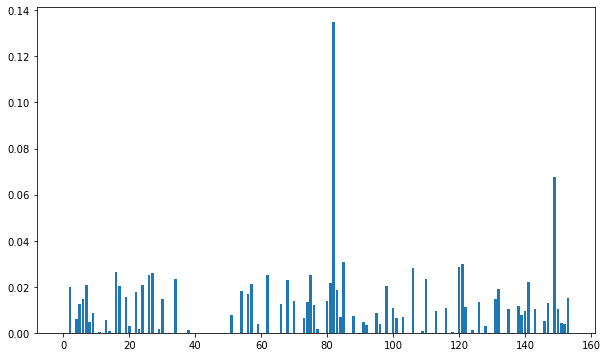

                              columna  mutual_info_classif
98                  incident_city_0.0                 0.02
24    collision_type_TOUNKNOWNIMP_1.0                 0.02
7                    age_TOAGEGROUP_7                 0.02
57           insured_relationship_0.0                 0.02
81                 collision_type_2.0                 0.02
141                 vehicle_claim_3.0                 0.02
68                  capital-gains_5.0                 0.02
110               property_damage_1.0                 0.02
34                   policy_state_1.0                 0.02
75                  incident_type_0.0                 0.03
26    collision_type_TOUNKNOWNIMP_3.0                 0.03
62           insured_relationship_5.0                 0.03
27   property_damage_TOUNKNOWNIMP_0.0                 0.03
16          incident_date_TOWEEKDAY_6                 0.03
106     number_of_vehicles_involved_2                 0.03
120            total_claim_amount_0.0                 0.

In [98]:
#VARIANTE 1 OBSERVAMOS LAS 20 MEJORES VARIABLES CON Mutual_info_classif CON EL DATASET ONEHOTENC. 
analizarVariablesDataSetMutual_info_classif(X_df_v3, y_df)

Variable 0 - age_TOAGEGROUP_10: 0.011919177037532647
Variable 1 - age_TOAGEGROUP_11: 0.0010830666295196245
Variable 2 - age_TOAGEGROUP_12: 0.003840680111996564
Variable 3 - age_TOAGEGROUP_3: 0.0
Variable 4 - age_TOAGEGROUP_4: 0.0
Variable 5 - age_TOAGEGROUP_5: 0.0
Variable 6 - age_TOAGEGROUP_6: 0.015681724675813635
Variable 7 - age_TOAGEGROUP_7: 0.0
Variable 8 - age_TOAGEGROUP_8: 0.0
Variable 9 - age_TOAGEGROUP_9: 0.011613725108799988
Variable 10 - incident_date_TOWEEKDAY_0: 0.0
Variable 11 - incident_date_TOWEEKDAY_1: 0.0
Variable 12 - incident_date_TOWEEKDAY_2: 0.0
Variable 13 - incident_date_TOWEEKDAY_3: 0.0
Variable 14 - incident_date_TOWEEKDAY_4: 0.02264156599052325
Variable 15 - incident_date_TOWEEKDAY_5: 0.006600197542926178
Variable 16 - incident_date_TOWEEKDAY_6: 0.0
Variable 17 - incident_hour_of_the_day_TOPARTOFTHEDAY_0.0: 0.03620469699190676
Variable 18 - incident_hour_of_the_day_TOPARTOFTHEDAY_1.0: 0.0054162638470900415
Variable 19 - incident_hour_of_the_day_TOPARTOFTHEDAY

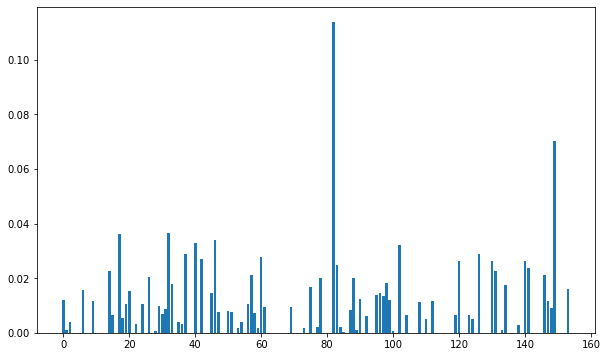

                                         columna  chi2
57                      insured_relationship_0.0  0.02
146                                          age  0.02
131                             injury_claim_5.0  0.02
14                     incident_date_TOWEEKDAY_4  0.02
141                            vehicle_claim_3.0  0.02
83                         incident_severity_1.0  0.02
120                       total_claim_amount_0.0  0.03
140                            vehicle_claim_2.0  0.03
130                             injury_claim_4.0  0.03
42                     policy_annual_premium_0.0  0.03
60                      insured_relationship_3.0  0.03
37                                policy_csl_1.0  0.03
126                             injury_claim_0.0  0.03
102                            incident_city_4.0  0.03
40                         policy_deductable_1.0  0.03
46                     policy_annual_premium_4.0  0.03
17   incident_hour_of_the_day_TOPARTOFTHEDAY_0.0  0.04
32      po

In [99]:
#VARIANTE 2 OBSERVAMOS LAS 20 MEJORES VARIABLES CON CHI2 CON EL DATASET ONEHOTENC.  
analizarVariablesDataSetChi2(X_df_v3, y_df)

### ANALIZAMOS DATASET CON ONEHOTENCODING con Chi2 y  Mutual_info_classif Scorers
#### CONCLUSIONES DE ESTE RESULTADO
- incident_severity: definitivamente la variable mas valorada en sus tres categorías
- incident_date_TOWEEKDAY_0: discretizar el día a día de la semana ha aumentado el score de la variable
- property_damage_TOUNKNOWNIMP y collision_type_TOUNKNOWNIMP: los missing values imputados a un valor propio tenían un significado para el modelo que las variables 
- incident_hour_of_the_day_TOPARTOFTHEDAY: discretizar la hora del incidente por parte del día y hacerle un OHE le ha dado valor
- age_TOAGEGROUP: agrupar las edades y realizarles el OneHotEncoding aumentado su score de variable Age al modelo

- llama la atención que variables como policy_csl_1, vehicle_claim_0 entén entre el TOP10 de chi2 y no aparezcan en el TOP20 de mutual_info_classif



                                             columna  mutual_info_classif
    133                           property_claim_1.0                 0.02
    9                               age_TOAGEGROUP_9                 0.02 
    85                         incident_severity_3.0                 0.02
    68                             capital-gains_5.0                 0.02
    100                            incident_city_2.0                 0.02
    123                       total_claim_amount_3.0                 0.02
    26               collision_type_TOUNKNOWNIMP_3.0                 0.03
    132                           property_claim_0.0                 0.03
    128                             injury_claim_2.0                 0.03
    18   incident_hour_of_the_day_TOPARTOFTHEDAY_1.0                 0.03
    57                      insured_relationship_0.0                 0.03
    130                             injury_claim_4.0                 0.03
    27              property_damage_TOUNKNOWNIMP_0.0                 0.03
    20   incident_hour_of_the_day_TOPARTOFTHEDAY_3.0                 0.03
    83                         incident_severity_1.0                 0.03
    28              property_damage_TOUNKNOWNIMP_1.0                 0.04
    10                     incident_date_TOWEEKDAY_0                 0.04
    44                     policy_annual_premium_2.0                 0.04
    149                              insured_hobbies                 0.08
    82                         incident_severity_0.0                 0.09
    
                                                 columna  chi2
    34                              policy_state_1.0  0.02
    109                          property_damage_0.0  0.02
    19   incident_hour_of_the_day_TOPARTOFTHEDAY_2.0  0.02
    134                           property_claim_2.0  0.02
    78                             incident_type_3.0  0.02
    144                    months_as_customer_TOYEAR  0.02
    76                             incident_type_1.0  0.02
    27              property_damage_TOUNKNOWNIMP_0.0  0.02
    6                               age_TOAGEGROUP_6  0.02
    48                               insured_sex_0.0  0.02
    85                         incident_severity_3.0  0.03
    106                number_of_vehicles_involved_2  0.03
    83                         incident_severity_1.0  0.03
    37                                policy_csl_1.0  0.03
    24               collision_type_TOUNKNOWNIMP_1.0  0.03
    138                            vehicle_claim_0.0  0.04
    129                             injury_claim_3.0  0.04
    2                              age_TOAGEGROUP_12  0.04
    149                              insured_hobbies  0.07
    82                         incident_severity_0.0  0.10

Variable 0 - age_TOAGEGROUP: 0.007476549867038607
Variable 1 - months_as_customer_TOYEAR: 0.02059125935600603
Variable 2 - incident_date_TOWEEKDAY: 0.009250039084852224
Variable 3 - incident_hour_of_the_day_TOPARTOFTHEDAY: 0.02831163838097539
Variable 4 - collision_type_TOUNKNOWNIMP: 0.043520840064088295
Variable 5 - property_damage_TOUNKNOWNIMP: 0.008864133315947154
Variable 6 - police_report_available_TOUNKNOWNIMP: 0.0
Variable 7 - months_as_customer: 0.0
Variable 8 - age: 0.0017846533492704708
Variable 9 - policy_state: 0.0
Variable 10 - policy_csl: 0.0
Variable 11 - policy_deductable: 0.0
Variable 12 - policy_annual_premium: 0.012458319645733962
Variable 13 - umbrella_limit: 0.012323084904349857
Variable 14 - insured_sex: 0.004174065652106096
Variable 15 - insured_education_level: 0.0
Variable 16 - insured_occupation: 0.026685373475642704
Variable 17 - insured_hobbies: 0.06093799735638883
Variable 18 - insured_relationship: 0.008383408017670568
Variable 19 - capital-gains: 0.0
Vari

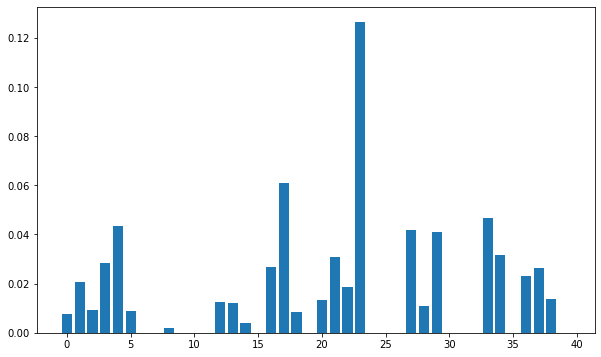

                                    columna  chi2
2                   incident_date_TOWEEKDAY  0.01
28              number_of_vehicles_involved  0.01
13                           umbrella_limit  0.01
12                    policy_annual_premium  0.01
20                             capital-loss  0.01
38                               auto_model  0.01
22                           collision_type  0.02
1                 months_as_customer_TOYEAR  0.02
36                            vehicle_claim  0.02
37                                auto_make  0.03
16                       insured_occupation  0.03
3   incident_hour_of_the_day_TOPARTOFTHEDAY  0.03
21                            incident_type  0.03
34                             injury_claim  0.03
29                          property_damage  0.04
27                 incident_hour_of_the_day  0.04
4               collision_type_TOUNKNOWNIMP  0.04
33                       total_claim_amount  0.05
17                          insured_hobbies  0.06


In [100]:
#VARIANTE 3 OBSERVAMOS LAS 20 MEJORES VARIABLES CON CHI2 CON EL DATASET NORMAL.  
analizarVariablesDataSetChi2(X_df_v1, y_df)

Variable 0 - age_TOAGEGROUP: 0.0009239428296161645
Variable 1 - months_as_customer_TOYEAR: 0.0035562458512667927
Variable 2 - incident_date_TOWEEKDAY: 0.0
Variable 3 - incident_hour_of_the_day_TOPARTOFTHEDAY: 0.014742437920584273
Variable 4 - collision_type_TOUNKNOWNIMP: 0.03746435999899167
Variable 5 - property_damage_TOUNKNOWNIMP: 0.00681434937667591
Variable 6 - police_report_available_TOUNKNOWNIMP: 0.022560094507936723
Variable 7 - months_as_customer: 0.0
Variable 8 - age: 0.03632808988450997
Variable 9 - policy_state: 0.00983853343638108
Variable 10 - policy_csl: 0.0
Variable 11 - policy_deductable: 0.0
Variable 12 - policy_annual_premium: 0.0
Variable 13 - umbrella_limit: 0.0
Variable 14 - insured_sex: 0.0
Variable 15 - insured_education_level: 0.0
Variable 16 - insured_occupation: 0.006366023941327903
Variable 17 - insured_hobbies: 0.0670052150524163
Variable 18 - insured_relationship: 0.01600694323769991
Variable 19 - capital-gains: 0.0
Variable 20 - capital-loss: 0.0
Variable 

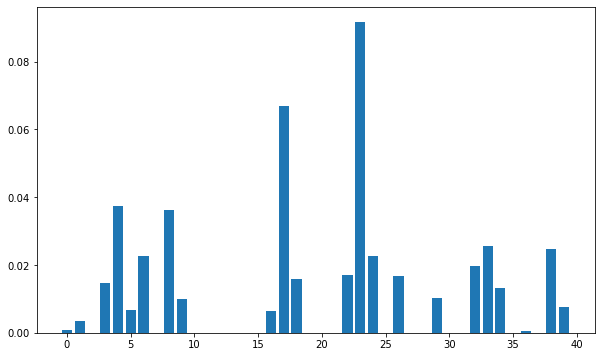

                                    columna  mutual_info_classif
1                 months_as_customer_TOYEAR                 0.00
16                       insured_occupation                 0.01
5              property_damage_TOUNKNOWNIMP                 0.01
39                                auto_year                 0.01
9                              policy_state                 0.01
29                          property_damage                 0.01
34                             injury_claim                 0.01
3   incident_hour_of_the_day_TOPARTOFTHEDAY                 0.01
18                     insured_relationship                 0.02
26                            incident_city                 0.02
22                           collision_type                 0.02
32                  police_report_available                 0.02
6      police_report_available_TOUNKNOWNIMP                 0.02
24                    authorities_contacted                 0.02
38                       

In [101]:
#VARIANTE 4 OBSERVAMOS LAS 20 MEJORES VARIABLES CON Mutual_info_classif CON EL DATASET NORMAL.  
analizarVariablesDataSetMutual_info_classif(X_df_v1, y_df)

### ANALIZAMOS DATASET SIN ONEHOTENCODING con Chi2 y  Mutual_info_classif Scorers
#### CONCLUSIONES DE ESTE RESULTADO
- Como podemos ver conviven age_TOAGEGROUP y age ganando en calificación age sin embargo tienen una calificación menor (0.02) que age_TOAGEGROUP con onehotencoder (0.04)
- Volvemos a ver como imputarle un valor propio a los missinig values ha subido la calificación de la misma




                            columna  mutual_info_classif
    39                    auto_year                 0.01
    28  number_of_vehicles_involved                 0.01
    26                incident_city                 0.01
    20                 capital-loss                 0.01
    25               incident_state                 0.01
    0                age_TOAGEGROUP                 0.01
    15      insured_education_level                 0.01
    37                    auto_make                 0.01
    16           insured_occupation                 0.02
    19                capital-gains                 0.02
    36                vehicle_claim                 0.02
    24        authorities_contacted                 0.02
    8                           age                 0.02
    10                   policy_csl                 0.02
    29              property_damage                 0.02
    34                 injury_claim                 0.03
    14                  insured_sex                 0.03
    4   collision_type_TOUNKNOWNIMP                 0.04
    17              insured_hobbies                 0.07
    23            incident_severity                 0.13
    
                            columna  chi2
    21                incident_type  0.00
    0                age_TOAGEGROUP  0.00
    28  number_of_vehicles_involved  0.01
    4   collision_type_TOUNKNOWNIMP  0.01
    15      insured_education_level  0.01
    35               property_claim  0.01
    39                    auto_year  0.01
    20                 capital-loss  0.01
    19                capital-gains  0.01
    12        policy_annual_premium  0.02
    34                 injury_claim  0.02
    8                           age  0.02
    32      police_report_available  0.03
    10                   policy_csl  0.03
    24        authorities_contacted  0.03
    31                    witnesses  0.04
    33           total_claim_amount  0.04
    17              insured_hobbies  0.05
    36                vehicle_claim  0.05
    23            incident_severity  0.13

## PASO 6 DEFINIMOS LOS MODELOS DE PREDICCIÓN SELECCIONADOS

In [102]:
#DEFINIMOS LOS MODELOS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


#Todos los modelos entregan una vector["Modelo","Desviación","Media del error en 10 Iteraciones" ]

In [103]:
def testeoDataSetConGaussianNB(X,y):


    errorNB = 0
    count = 0
    errorList = []
    media = 0
    std = 0
    for random in range(0,99,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)
        gnb = GaussianNB()
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
#         print("Number of mislabeled points out of a total %d points : %d = %d percent error ratio" % (X_test.shape[0], (y_test != y_pred).sum(),100*(y_test != y_pred).sum()/X_test.shape[0]))
        errorNB += (100*(y_test != y_pred).sum()/X_test.shape[0])
        count += 1
        errorList.append(100*(y_test != y_pred).sum()/X_test.shape[0])
    suma = 0
    for values in errorList:
        suma += (values-errorNB/count)**2
    std = (suma/count)**(1/2)
    media = errorNB/count
#     print("media de error en %d distribuciones distintas %d por ciento" %(count, errorNB/count))
#     print("con una desviación de",std)
    count = 0
    return ["GaussNaiv",std,media]

In [104]:
def testeoDataSetConLogisticRegression(X,y):

    errorLR = 0
    count = 0
    errorList = []
    media = 0
    std = 0
    for random in range(0,99,1):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)
        LogReg = LogisticRegression(solver="liblinear",max_iter = 5000, random_state=0, multi_class="ovr")
        y_pred = LogReg.fit(X_train, y_train).predict(X_test)
#         print("Number of mislabeled points out of a total %d points : %d = %d percent error ratio" % (X_test.shape[0], (y_test != y_pred).sum(),100*(y_test != y_pred).sum()/X_test.shape[0]))
        errorLR += (100*(y_test != y_pred).sum()/X_test.shape[0])
        count += 1
        errorList.append(100*(y_test != y_pred).sum()/X_test.shape[0])
    suma = 0
    for values in errorList:
        suma += (values-errorLR/count)**2
    std = (suma/count)**(1/2)
    media = errorLR/count
#     print("media de error en %d distribuciones distintas de %d por ciento" %(count, errorLR/count))
#     print("con una desviación de",std)
    count = 0
    return ["LogReg",std,media]

In [105]:
def testeoDataSetConKNeighborsClassifier(X,y):

    errorKNN = 0
    count = 0
    errorList = []
    media = 0
    std = 0
    for random in range(0,99,1):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)
        neigh = KNeighborsClassifier(n_neighbors=5)
        y_pred = neigh.fit(X_train, y_train).predict(X_test)
    #     print("Number of mislabeled points out of a total %d points : %d = %d percent error ratio" % (X_test.shape[0], (y_test != y_pred).sum(),100*(y_test != y_pred).sum()/X_test.shape[0]))
        errorKNN += (100*(y_test != y_pred).sum()/X_test.shape[0])
        count += 1
        errorList.append(100*(y_test != y_pred).sum()/X_test.shape[0])
    suma = 0
    for values in errorList:
        suma += (values-errorKNN/count)**2
    std = (suma/count)**(1/2)
    media = errorKNN/count
#     print("media de error en %d distribuciones distintas de %d por ciento" %(count, errorKNN/count))
#     print("con una desviación de",std)
    count = 0
    return ["KNN",std,media]

In [106]:
def testeoDataSetConDecisionTreeClassifier(X,y):

    errorTree = 0
    count = 0
    errorList = []
    media = 0
    std = 0
    for random in range(0,99,1):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)
        DecTree = tree.DecisionTreeClassifier()
        y_pred = DecTree.fit(X_train, y_train).predict(X_test)
#         print("Number of mislabeled points out of a total %d points : %d = %d percent error ratio" % (X_test.shape[0], (y_test != y_pred).sum(),100*(y_test != y_pred).sum()/X_test.shape[0]))
        errorTree += (100*(y_test != y_pred).sum()/X_test.shape[0])
        count += 1
        errorList.append(100*(y_test != y_pred).sum()/X_test.shape[0])
    suma = 0
    for values in errorList:
        suma += (values-errorTree/count)**2
    std = (suma/count)**(1/2)
    media = errorTree/count
#     print("media de error en %d distribuciones distintas de %d por ciento" %(count, errorTree/count))
#     print("con una desviación de",std)
    count = 0
    return ["tree",std,media]

In [107]:
#PARA PODER RECOGER LA INFORMACIÓN EN FORMA DE DATASET LE HACEMOS QUE ESCUPA UN ARRAY 2D   
def TesteoModelos(X, y):
    lista = []
#     print("modelo naive bayes gaussiano")
    lista.append(testeoDataSetConGaussianNB(X,y))
    
#     print("modelo arbol de decisiones de clasificación")
    lista.append(testeoDataSetConDecisionTreeClassifier(X,y))

#     print("modelo arbol de regresión logistica")
    lista.append(testeoDataSetConLogisticRegression(X,y))

#     print("modelo de K vecinos")
    lista.append(testeoDataSetConKNeighborsClassifier(X,y))
    return lista

In [108]:
lista = TesteoModelos(X_df_v1,y_df)
lista

[['GaussNaiv', 2.563388801317451, 28.717171717171702],
 ['tree', 2.1513965917919364, 22.666666666666668],
 ['LogReg', 2.4012801401754142, 23.46464646464646],
 ['KNN', 2.2101498423952535, 29.521885521885515]]

## PASO 7 CREAMOS EL MECANISMO DE ANALISIS PARA CREAR UNA DATAFRAME CON LAS POSIBLES PARAMETROS Y PODER ANALIZAR LA MEJOR CONFIGURACIÓN DE CUAL ES EL NUMERO DE VARIABLES ÓPTIMO

In [110]:
def NmejoresVariables(X_df,y_df,n):

    cont=1
    matriz = []
    for variables in range(1,1+n,1):
        X_df_1_1 = SelectKBest(mutual_info_classif, k=variables).fit_transform(X_df, y_df)
        registros = TesteoModelos(X_df_1_1,y_df)
        for listas in registros:
            listas.append(variables)
            listas.append("mutual_info_classif")
            matriz.append(listas)
        

        X_df_v1_2 = SelectKBest(chi2, k=variables).fit_transform(X_df, y_df)
        registros = TesteoModelos(X_df_v1_2,y_df)
        for listas in registros:
            listas.append(variables)
            listas.append("chi2")
            matriz.append(listas)
        print(cont)
        cont+=1

    df = pd.DataFrame(matriz, columns = ['modelo','desviación','error',"No Vables Usadas","métodoSelección"])
    return df

## PASO 8 APLICAMOS NUESTRO MÉTODO A AMBOS DATASETS CON LA SELECCION DE 1 A 15 VARIABLES (Inicialmente lo probé con hasta 35 pero ninguna seleccion de variables de mas  de 15 entró en el top 20 de los mejores resultados)

In [111]:
DataSetNormal = NmejoresVariables(X_df_v1,y_df,15)
DataSetNormal.sort_values(by=["error"],ascending=True).head(20)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


,modelo,desviación,error,No Vables Usadas,métodoSelección
9,tree,1.70,15.36,2,mutual_info_classif
11,KNN,1.82,15.73,2,mutual_info_classif
19,KNN,2.38,17.32,3,mutual_info_classif
17,tree,2.03,18.13,3,mutual_info_classif
1,tree,1.81,19.12,1,mutual_info_classif
5,tree,1.81,19.12,1,chi2
41,tree,2.27,20.35,6,mutual_info_classif
69,tree,1.99,20.49,9,chi2
20,GaussNaiv,1.90,20.60,3,chi2
77,tree,1.95,20.60,10,chi2


In [112]:
DataSetOHE = NmejoresVariables(X_df_v3,y_df,15)
DataSetOHE.sort_values(by=["error"],ascending=True).head(20)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


,modelo,desviación,error,No Vables Usadas,métodoSelección
9,tree,1.67,15.29,2,mutual_info_classif
17,tree,1.65,15.45,3,mutual_info_classif
33,tree,1.79,15.56,5,mutual_info_classif
19,KNN,1.68,15.69,3,mutual_info_classif
11,KNN,1.73,15.72,2,mutual_info_classif
35,KNN,1.72,15.72,5,mutual_info_classif
27,KNN,1.80,15.76,4,mutual_info_classif
25,tree,1.76,16.36,4,mutual_info_classif
43,KNN,1.85,16.94,6,mutual_info_classif
67,KNN,1.91,17.89,9,mutual_info_classif


## PASO 9 PREPARAMOS DATOS PARA GRAFICAR EL DATASET ONE-HOT-ENCODED Y PLOTEAMOS

In [130]:
DataSetOHEchi2 = DataSetOHE.groupby("métodoSelección").get_group("chi2")
DataSetOHEmic = DataSetOHE.groupby("métodoSelección").get_group("mutual_info_classif")


df_treeOHEchi2 = DataSetOHEchi2.groupby("modelo").get_group("tree")
df_KNNOHEchi2 = DataSetOHEchi2.groupby("modelo").get_group("KNN")
df_LogRegOHEchi2 = DataSetOHEchi2.groupby("modelo").get_group("LogReg")
df_GaussNaivOHEchi2 = DataSetOHEchi2.groupby("modelo").get_group("GaussNaiv")

df_treeOHEmic = DataSetOHEmic.groupby("modelo").get_group("tree")
df_KNNOHEmic = DataSetOHEmic.groupby("modelo").get_group("KNN")
df_LogRegOHEmic = DataSetOHEmic.groupby("modelo").get_group("LogReg")
df_GaussNaivOHEmic = DataSetOHEmic.groupby("modelo").get_group("GaussNaiv")



## 1. Plot Precisión obtenida con los distintos modelos en función del número de variables obtenidas del selector chi2 con el dataset al cual hemos pasado el one-hot-encoder

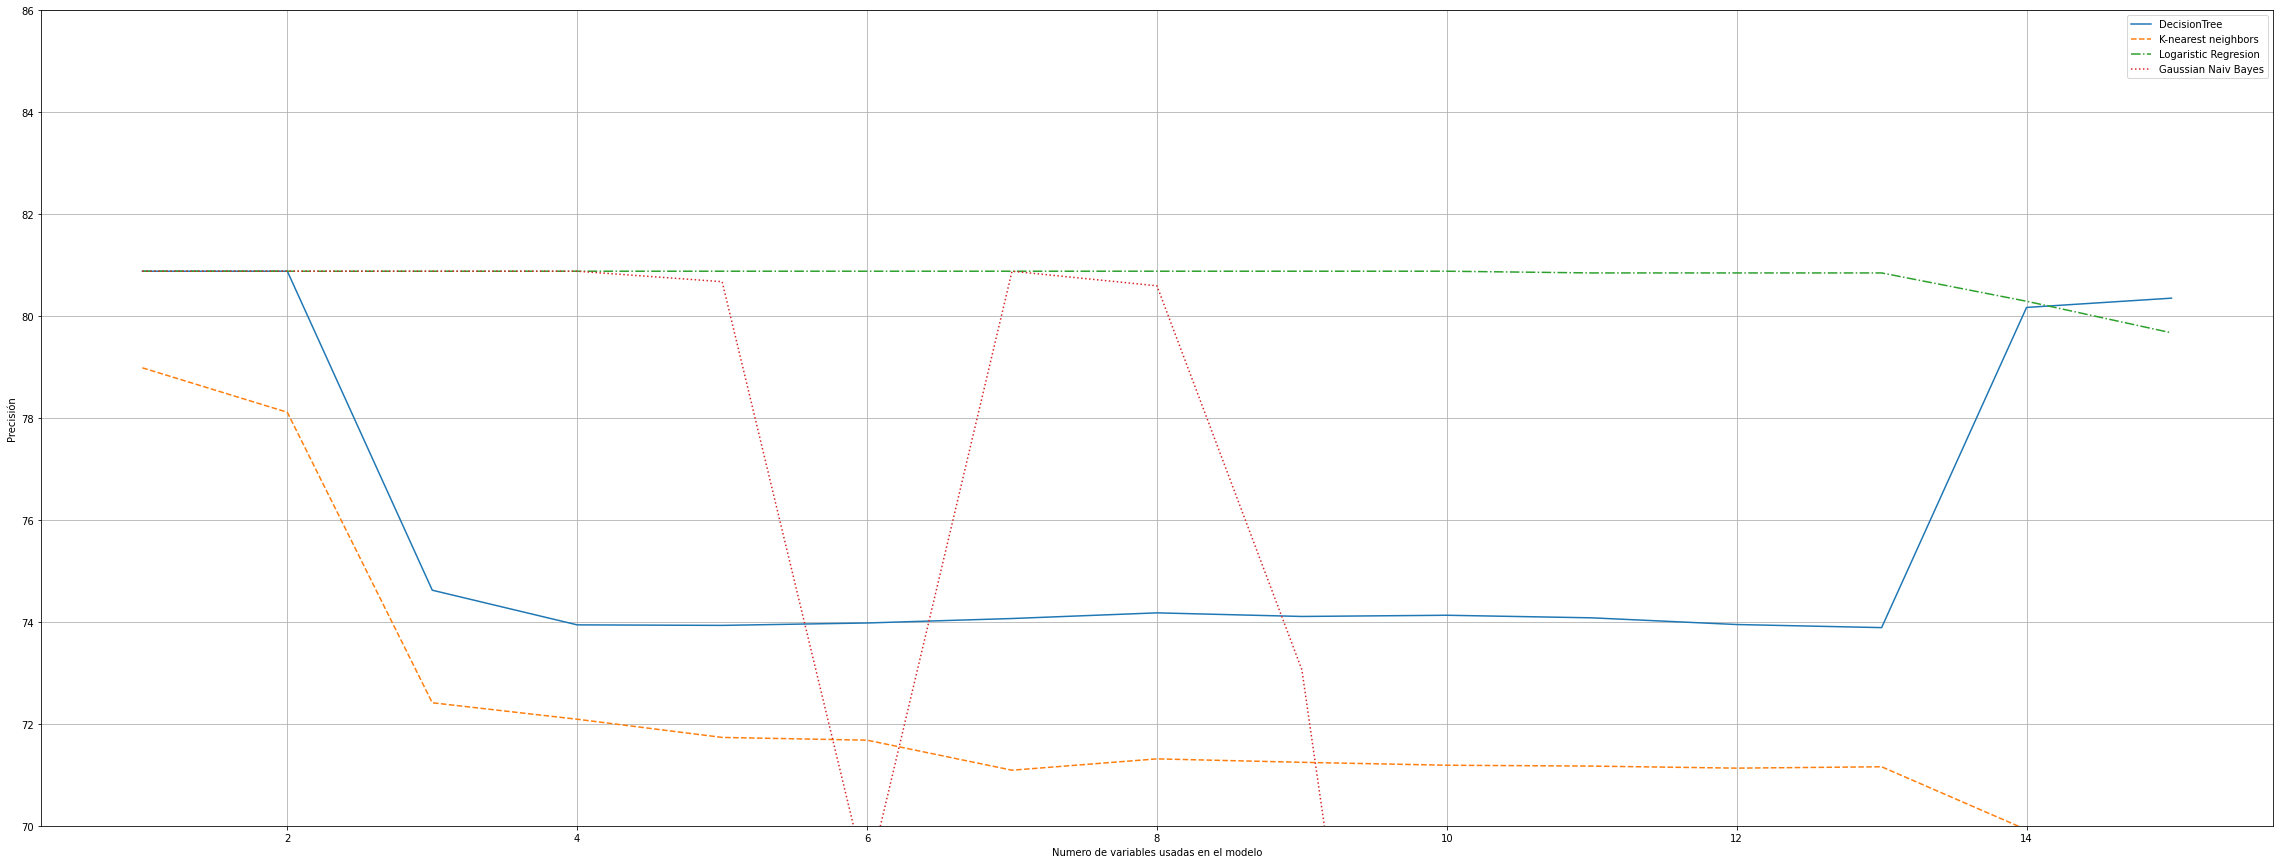

In [169]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = df_treeOHEchi2["No Vables Usadas"]
# plot lines
plt.plot(x, 100-df_treeOHEchi2["error"], label = "DecisionTree", linestyle="-")
plt.plot(x, 100-df_KNNOHEchi2["error"], label = "K-nearest neighbors", linestyle="--")
plt.plot(x, 100-df_LogRegOHEchi2["error"], label = "Logaristic Regresion", linestyle="-.")
plt.plot(x, 100-df_GaussNaivOHEchi2["error"], label = "Gaussian Naiv Bayes", linestyle=":")
plt.legend()

plt.grid()
plt.xlabel("Numero de variables usadas en el modelo")
plt.ylabel("Precisión")
plt.ylim(70,86)
plt.rcParams["figure.figsize"] = (40,15)
plt.show()

## 2. Plot Precisión obtenida con los distintos modelos en función del número de variables obtenidas del selector mutual_info_classif con el dataset al cual hemos pasado el one-hot-encoder

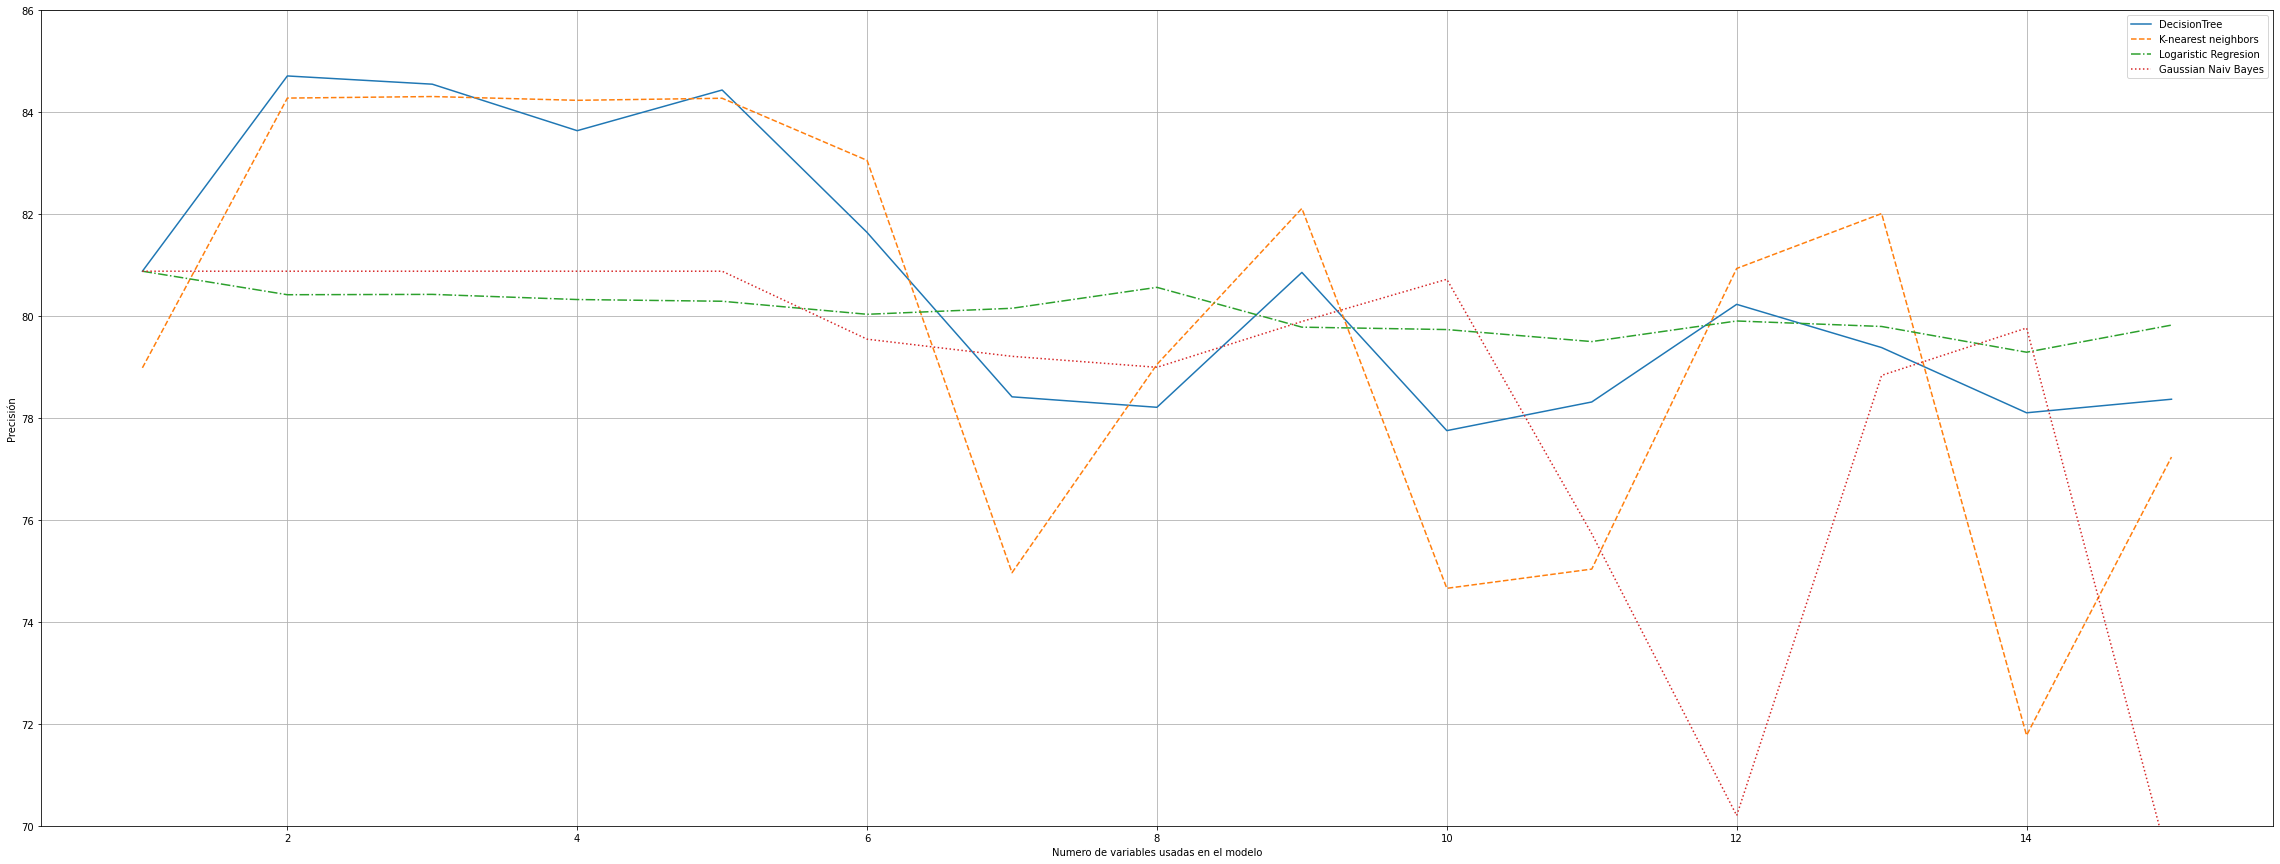

In [171]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = df_treeOHEmic["No Vables Usadas"]
# plot lines
plt.plot(x, 100-df_treeOHEmic["error"], label = "DecisionTree", linestyle="-")
plt.plot(x, 100-df_KNNOHEmic["error"], label = "K-nearest neighbors", linestyle="--")
plt.plot(x, 100-df_LogRegOHEmic["error"], label = "Logaristic Regresion", linestyle="-.")
plt.plot(x, 100-df_GaussNaivOHEmic["error"], label = "Gaussian Naiv Bayes", linestyle=":")
plt.legend()

plt.grid()
plt.xlabel("Numero de variables usadas en el modelo")
plt.ylabel("Precisión")
plt.ylim(70,86)
plt.rcParams["figure.figsize"] = (40,15)
plt.show()

In [173]:
DataSetNormalchi2 = DataSetNormal.groupby("métodoSelección").get_group("chi2")
DataSetNormalmic = DataSetNormal.groupby("métodoSelección").get_group("mutual_info_classif")


df_treeNormalchi2 = DataSetNormalchi2.groupby("modelo").get_group("tree")
df_KNNNormalchi2 = DataSetNormalchi2.groupby("modelo").get_group("KNN")
df_LogRegNormalchi2 = DataSetNormalchi2.groupby("modelo").get_group("LogReg")
df_GaussNaivNormalchi2 = DataSetNormalchi2.groupby("modelo").get_group("GaussNaiv")

df_treeNormalmic = DataSetNormalmic.groupby("modelo").get_group("tree")
df_KNNNormalmic = DataSetNormalmic.groupby("modelo").get_group("KNN")
df_LogRegNormalmic = DataSetNormalmic.groupby("modelo").get_group("LogReg")
df_GaussNaivNormalmic = DataSetNormalmic.groupby("modelo").get_group("GaussNaiv")



## 3. Plot Precisión obtenida con los distintos modelos en función del número de variables obtenidas del selector chi2 con el dataset normal

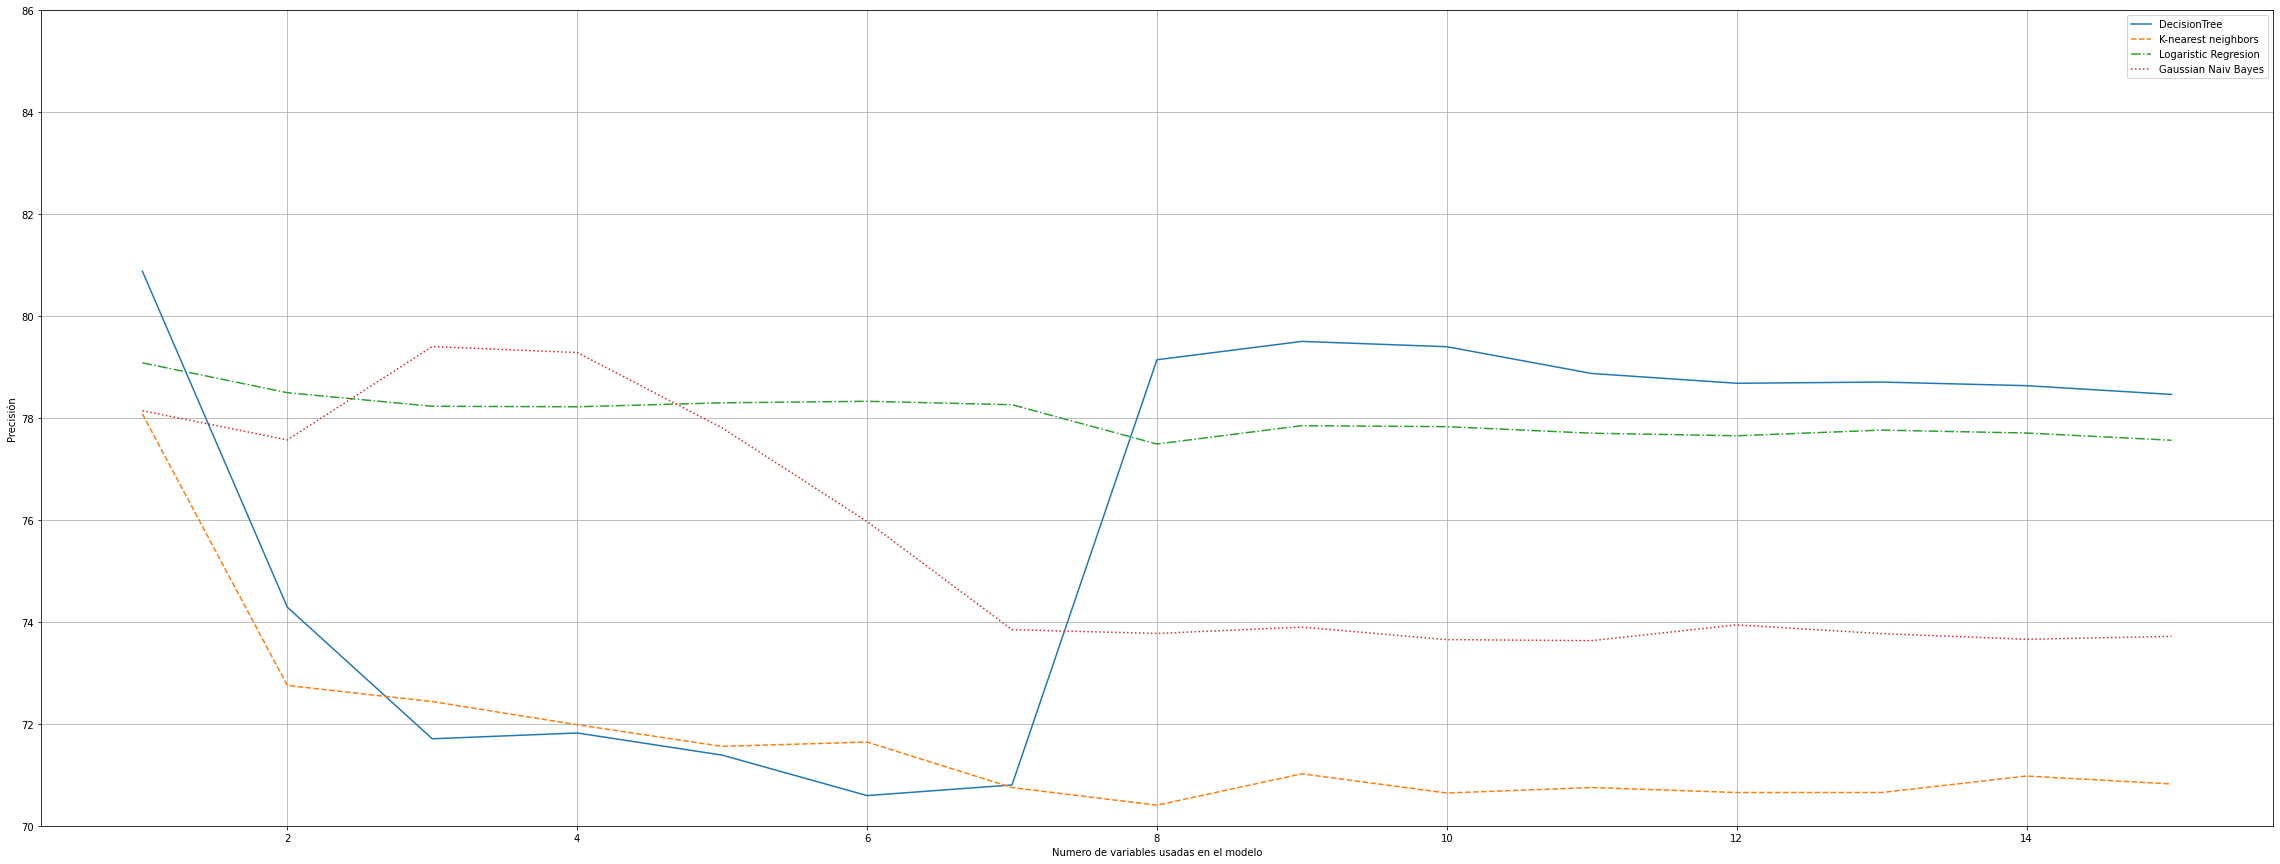

In [174]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = df_treeOHEchi2["No Vables Usadas"]
# plot lines
plt.plot(x, 100-df_treeNormalchi2["error"], label = "DecisionTree", linestyle="-")
plt.plot(x, 100-df_KNNNormalchi2["error"], label = "K-nearest neighbors", linestyle="--")
plt.plot(x, 100-df_LogRegNormalchi2["error"], label = "Logaristic Regresion", linestyle="-.")
plt.plot(x, 100-df_GaussNaivNormalchi2["error"], label = "Gaussian Naiv Bayes", linestyle=":")
plt.legend()

plt.grid()
plt.xlabel("Numero de variables usadas en el modelo")
plt.ylabel("Precisión")
plt.ylim(70,86)
plt.rcParams["figure.figsize"] = (40,15)
plt.show()

## 4. Plot Precisión obtenida con los distintos modelos en función del número de variables obtenidas del selector mutual_info_classif con el dataset normal

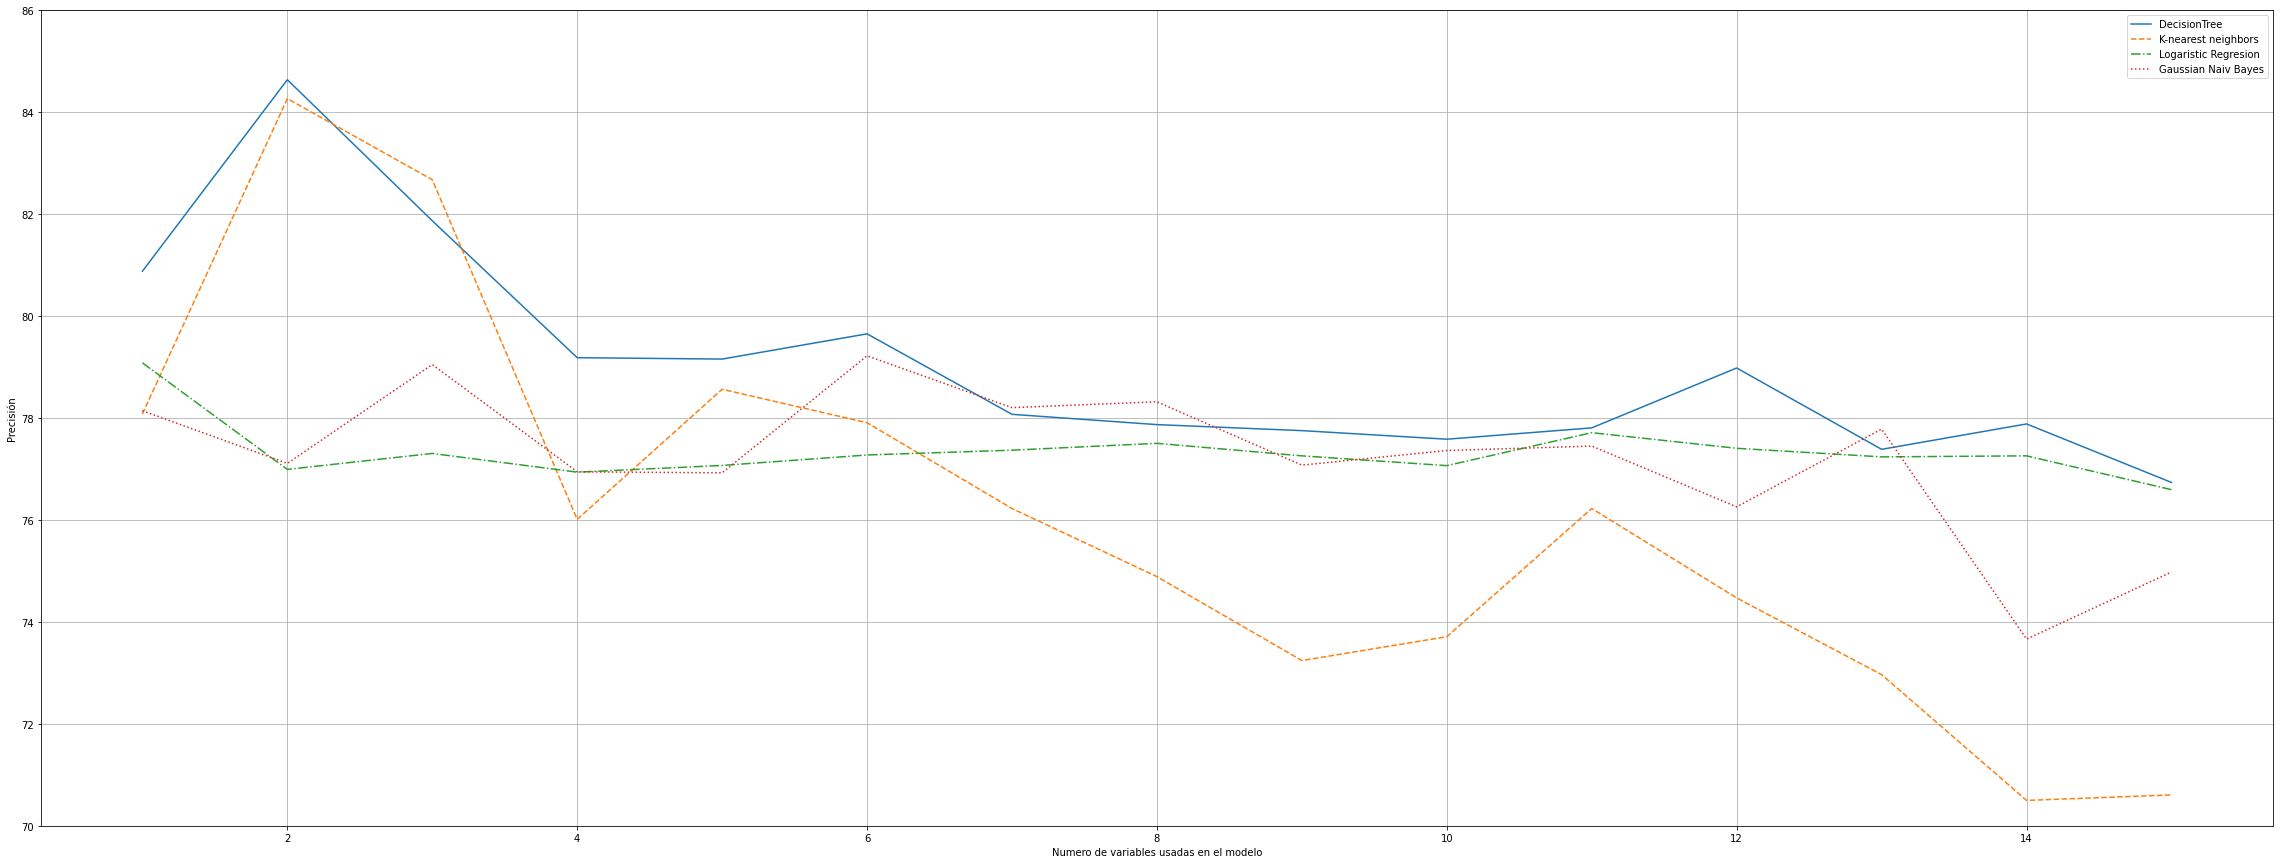

In [175]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = df_treeOHEchi2["No Vables Usadas"]
# plot lines
plt.plot(x, 100-df_treeNormalmic["error"], label = "DecisionTree", linestyle="-")
plt.plot(x, 100-df_KNNNormalmic["error"], label = "K-nearest neighbors", linestyle="--")
plt.plot(x, 100-df_LogRegNormalmic["error"], label = "Logaristic Regresion", linestyle="-.")
plt.plot(x, 100-df_GaussNaivNormalmic["error"], label = "Gaussian Naiv Bayes", linestyle=":")
plt.legend()

plt.grid()
plt.xlabel("Numero de variables usadas en el modelo")
plt.ylabel("Precisión")
plt.ylim(70,86)
plt.rcParams["figure.figsize"] = (40,15)
plt.show()

## CONCLUSIONES: 
    - Selector con mejores resultados: mutual_info_classif
    - Modelos con mejores resultados: 
        - Decision Tree mutual_info_classif selector con 2 variables
        - KNN mutual_info_classif selector con 2 variables
        - La mejoría que se obtiene con el One-Hot-Encoding y sin él es aproximadamente una décima de precisión

  